# The Sparks Foundations Internship Tasks

Internship: Data Science and Business Analytics

Task 1: Prediction using Supervised ML

Objective: Predict the percentage of Student based on number of hours studied

Data: http://bit.ly/w-data

Author: Sakshi Rode

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [17]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Successfully imported data")

Successfully imported data


In [14]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
# Check if there any null value in the Dataset
data.isnull == True

False

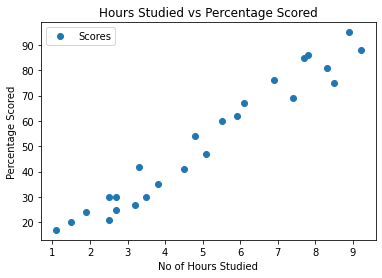

In [19]:

# Plotting score distribution graph
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the Study hours and the Student scores

# Preparing The Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [33]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Splitting the data into training data-set and test data-set. Then, start training the algorithm.

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
# Training Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Prediction model Training completed")

Prediction model Training completed


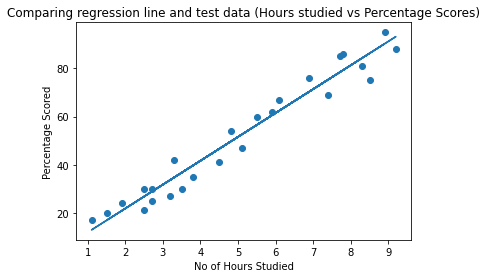

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Comparing regression line and test data (Hours studied vs Percentage Scores)')
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Scored')
plt.show()
print(data.corr())

In [38]:
# Using trained model to make predictions
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [39]:
# Comparing Actual data with your Predicted data
df = pd.DataFrame({'Actual Marks':y_test , 'Predicted Marks': pred_y})
df

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


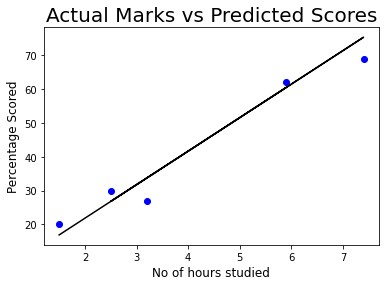

In [40]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='black')
plt.title('Actual Marks vs Predicted Scores', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('No of hours studied', size=12)
plt.show()

In [41]:
#Importing mean absolute error
from sklearn.metrics import mean_absolute_error
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


In [42]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
